# Capstone Project - The Battle of Neighborhoods

#### Average Prices and School Ratings
Scarborough is a popular destination in Canada. It is one of the most diverse and multicultural areas in the Greater Toronto Area, being home to various religious groups and places of worship.

#### Project Description: 
The projects aim to create an analysis of features for a neighborhood or a comparative analysis between neighborhoods with just sending out the names of the neighborhoods. The features include like population rate, median house price, school ratings, crime rates, weather conditions, recreational facilities. This would help people to get awareness of the places before moving to a new country, state, city or place for their work or to start a new life

#### Required Packages

In [124]:
# Import Libraries

import numpy as np
import pandas as pd

# convert json file into DataFrame
from pandas.io.json import json_normalize

#geocoders
from geopy.geocoders import Nominatim
import folium
import requests

#kmeans clustering
from sklearn.cluster import KMeans

#Visualization
import matplotlib.cm as cm
import matplotlib.colors as colors

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the data
df = pd.read_csv('C:/Users/shaswat/Documents/Projects/Coursera_Capstone/Toronto_Coord_DataFrame.csv')
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### Choose the neighbourhoods that contain word " Scarborough":

In [7]:
sc_df = df[df['Borough'] == 'Scarborough'].reset_index(drop=True)
sc_df.head()


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [8]:
#size of Scarborough dataframe
sc_df.shape

(17, 5)

#### Get the Coordinates of Scarborough

In [25]:
address = 'Scarborough, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Scarborough are 43.773077, -79.257774.


#### Map Scarborough Canada

In [26]:
#create the Folium map of Scarborough
map_Scarborough = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(sc_df['Latitude'], sc_df['Longitude'], sc_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

#### Utilizing the Foursquare API to get top 100 venues in Scarborough

In [14]:
# @hiddel_cell
#set credintials of Foursquare API
CLIENT_ID = 'JA2URYDQ2ROLSJSZ3D1ZJJYZTGLWH1GS1ENSNLEQLJD2WNPD' # Foursquare ID
CLIENT_SECRET = 'CDNXJBM40TCGFGQR3DV0N1BKCTQXYVUQVMAGBRSTKWDF0XVN' # Foursquare Secret
VERSION = '20190707' # Foursquare API version

In [16]:
radius = 500 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [37]:
venues=results['response']['groups'][0]['items']
nearby_venues_df = json_normalize(venues)
nearby_venues_df.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.events.count', 'venue.events.summary', 'venue.id',
       'venue.location.address', 'venue.location.cc', 'venue.location.city',
       'venue.location.country', 'venue.location.crossStreet',
       'venue.location.distance', 'venue.location.formattedAddress',
       'venue.location.labeledLatLngs', 'venue.location.lat',
       'venue.location.lng', 'venue.location.neighborhood',
       'venue.location.postalCode', 'venue.location.state', 'venue.name',
       'venue.photos.count', 'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [33]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

####  The function to get Top 100 venues in Scarborough within a radius of 500m:

In [38]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_df =nearby_venues_df.loc[:, filtered_columns]
nearby_venues_df.head(5)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
1,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
2,American Eagle Outfitters,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775908,-79.258352
3,St. Andrews Fish & Chips,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",43.771865,-79.252645
4,Tommy Hilfiger Company Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776015,-79.257369


#### Categories of Nearby Venues

In [39]:
nearby_venues_df['venue.categories'] = nearby_venues_df.apply(get_category_type, axis=1)

# clean columns
nearby_venues_df.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues_df.head(5)

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,SEPHORA,Cosmetics Shop,43.775017,-79.258109
2,American Eagle Outfitters,Clothing Store,43.775908,-79.258352
3,St. Andrews Fish & Chips,Fish & Chips Shop,43.771865,-79.252645
4,Tommy Hilfiger Company Store,Clothing Store,43.776015,-79.257369


In [40]:
# Top 10 Categories
a=pd.Series(nearby_venues_df.categories)
a.value_counts()[:10]

Clothing Store         6
Coffee Shop            3
Sporting Goods Shop    3
Women's Store          2
Shopping Mall          2
Cosmetics Shop         2
Sandwich Place         2
Tea Room               2
Pet Store              1
Video Game Store       1
Name: categories, dtype: int64

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

#### Run the above function on each neighborhood and create a new dataframe 

In [42]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

Scarb_venues_df = getNearbyVenues(names=sc_df['Neighbourhood'],
                                   latitudes=sc_df['Latitude'],
                                   longitudes=sc_df['Longitude']
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge


In [43]:
#size of venues dataframe
Scarb_venues_df.shape

(89, 7)

In [44]:
#unique categories of venues
print('There are {} unique categories.'.format(len(Scarb_venues_df['Venue Category'].unique())))

There are 53 unique categories.


## Analysing each neighbourhood

In [47]:
# one hot encoding
dt_onehot = pd.get_dummies(Scarb_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Neighborhood'] = Scarb_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bus Line,...,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Soccer Field,Spa,Tech Startup,Thai Restaurant,Thrift / Vintage Store,Vietnamese Restaurant
0,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Highland Creek,Rouge Hill,Port Union",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Highland Creek,Rouge Hill,Port Union",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood,Morningside,West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#the dataframe size
dt_onehot.shape

(89, 54)

#### Gouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category:

In [49]:
dt_grouped = dt_onehot.groupby('Neighborhood').mean().reset_index()
dt_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bus Line,...,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Soccer Field,Spa,Tech Startup,Thai Restaurant,Thrift / Vintage Store,Vietnamese Restaurant
0,Agincourt,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.250000,0.0,...,0.000000,0.250000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.000000
1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.000000,0.333333,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.000000
2,"Birch Cliff,Cliffside West",0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.25,0.0,0.000000,0.000000,0.000,0.000000,0.000000
3,Cedarbrae,0.000000,0.000000,0.125,0.000000,0.125000,0.125,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.125,0.000000,0.000000
4,"Clairlea,Golden Mile,Oakridge",0.000000,0.000000,0.000,0.000000,0.200000,0.000,0.0,0.000000,0.2,...,0.000000,0.000000,0.000000,0.00,0.1,0.000000,0.000000,0.000,0.000000,0.000000
5,"Clarks Corners,Sullivan,Tam O'Shanter",0.000000,0.000000,0.000,0.000000,0.000000,0.100,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.100,0.000000,0.000000
6,"Cliffcrest,Cliffside,Scarborough Village West",0.333333,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.000000
7,"Dorset Park,Scarborough Town Centre,Wexford He...",0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.166667
8,"East Birchmount Park,Ionview,Kennedy Park",0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.000000
9,"Guildwood,Morningside,West Hill",0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.111111,0.0,...,0.111111,0.000000,0.000000,0.00,0.0,0.111111,0.111111,0.000,0.000000,0.000000


In [50]:
#the grouped dataframe size
dt_grouped.shape

(16, 54)

#### Printing out each neighborhood along with the top 5 most common venues in it:

In [51]:
num_top_venues = 5

for hood in dt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dt_grouped[dt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                 venue  freq
0               Lounge  0.25
1       Breakfast Spot  0.25
2       Sandwich Place  0.25
3   Chinese Restaurant  0.25
4  American Restaurant  0.00


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
               venue  freq
0   Asian Restaurant  0.33
1               Park  0.33
2         Playground  0.33
3           Pharmacy  0.00
4  Korean Restaurant  0.00


----Birch Cliff,Cliffside West----
                   venue  freq
0        College Stadium  0.25
1  General Entertainment  0.25
2           Skating Rink  0.25
3                   Café  0.25
4            Pizza Place  0.00


----Cedarbrae----
                  venue  freq
0  Caribbean Restaurant  0.12
1    Athletics & Sports  0.12
2                Bakery  0.12
3                  Bank  0.12
4       Thai Restaurant  0.12


----Clairlea,Golden Mile,Oakridge----
           venue  freq
0         Bakery   0.2
1       Bus Line   0.2
2   Intersection   0.1
3  Metro Station   0.1
4   

#### Converting the results to Pandas dataframe

In [110]:
#function to sort the venues in descending order:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Most Common venues near neighborhood

In [111]:
um_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dt_grouped['Neighborhood']

for ind in np.arange(dt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Lounge,Sandwich Place,Breakfast Spot,Chinese Restaurant,Vietnamese Restaurant
1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Park,Asian Restaurant,Playground,Vietnamese Restaurant,General Entertainment
2,"Birch Cliff,Cliffside West",General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant
3,Cedarbrae,Caribbean Restaurant,Thai Restaurant,Athletics & Sports,Fried Chicken Joint,Bakery
4,"Clairlea,Golden Mile,Oakridge",Bakery,Bus Line,Intersection,Fast Food Restaurant,Soccer Field


### Cluster Neighborhoods

#### Run k-means to cluster the neighborhood into 5 clusters.

In [112]:
# set number of clusters
kclusters = 4

dt_grouped_clustering = dt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

#### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [113]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Labels', kmeans.labels_)

dt_merged = sc_df

# merge downtown_grouped with Scarborough data to add latitude/longitude for each neighborhood
# I realized that I've misspelled the NeighboUrhood column name in Scarborough dataframe. oops...
dt_merged = dt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

dt_merged.dropna(subset=['Labels'], inplace = True)
dt_merged['Labels'] = dt_merged['Labels'].astype(int)
dt_merged

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,1,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Chinese Restaurant,Grocery Store
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,3,Bar,Construction & Landscaping,Vietnamese Restaurant,Coffee Shop,Grocery Store
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,1,Intersection,Breakfast Spot,Mexican Restaurant,Tech Startup,Spa
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2,Coffee Shop,Korean Restaurant,Convenience Store,Vietnamese Restaurant,Grocery Store
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1,Caribbean Restaurant,Thai Restaurant,Athletics & Sports,Fried Chicken Joint,Bakery
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0,Playground,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,General Entertainment
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,2,Discount Store,Department Store,Playground,Coffee Shop,Vietnamese Restaurant
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,1,Bakery,Bus Line,Intersection,Fast Food Restaurant,Soccer Field
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,1,Motel,American Restaurant,Coffee Shop,Grocery Store,General Entertainment
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,1,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant


### Visualize the resulting clusters on map:

In [144]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['Latitude'], 
                                  dt_merged['Longitude'], 
                                  dt_merged['Neighbourhood'], 
                                  dt_merged['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

###  Examine the clusters

In [147]:
#Cluster 1
df1=dt_merged.loc[dt_merged['Labels'] == 0, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df1


,Neighbourhood,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Scarborough Village,0,Playground,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,General Entertainment


In [148]:
#Cluster 2
df2=dt_merged.loc[dt_merged['Labels'] == 1, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df2

,Neighbourhood,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Rouge,Malvern",1,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Chinese Restaurant,Grocery Store
2,"Guildwood,Morningside,West Hill",1,Intersection,Breakfast Spot,Mexican Restaurant,Tech Startup,Spa
4,Cedarbrae,1,Caribbean Restaurant,Thai Restaurant,Athletics & Sports,Fried Chicken Joint,Bakery
7,"Clairlea,Golden Mile,Oakridge",1,Bakery,Bus Line,Intersection,Fast Food Restaurant,Soccer Field
8,"Cliffcrest,Cliffside,Scarborough Village West",1,Motel,American Restaurant,Coffee Shop,Grocery Store,General Entertainment
9,"Birch Cliff,Cliffside West",1,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant
10,"Dorset Park,Scarborough Town Centre,Wexford He...",1,Indian Restaurant,Chinese Restaurant,Latin American Restaurant,Vietnamese Restaurant,Pet Store
11,"Maryvale,Wexford",1,Middle Eastern Restaurant,Auto Garage,Bakery,Shopping Mall,Sandwich Place
12,Agincourt,1,Lounge,Sandwich Place,Breakfast Spot,Chinese Restaurant,Vietnamese Restaurant
13,"Clarks Corners,Sullivan,Tam O'Shanter",1,Pizza Place,Noodle House,Thai Restaurant,Fried Chicken Joint,Fast Food Restaurant


In [149]:
#Cluster 3
df3=dt_merged.loc[dt_merged['Labels'] == 2, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df3

,Neighbourhood,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Woburn,2,Coffee Shop,Korean Restaurant,Convenience Store,Vietnamese Restaurant,Grocery Store
6,"East Birchmount Park,Ionview,Kennedy Park",2,Discount Store,Department Store,Playground,Coffee Shop,Vietnamese Restaurant


In [150]:
#Cluster 4
df4=dt_merged.loc[dt_merged['Labels'] == 3, dt_merged.columns[[2] + list(range(5, dt_merged.shape[1]))]]
df4

,Neighbourhood,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,"Highland Creek,Rouge Hill,Port Union",3,Bar,Construction & Landscaping,Vietnamese Restaurant,Coffee Shop,Grocery Store


#### Average Housing Prices

In [157]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighbourhood":dt_merged["Neighbourhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0]})


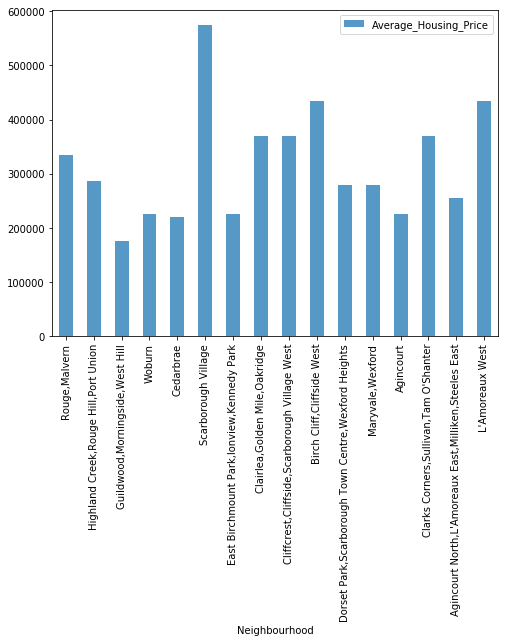

In [159]:
Scarborough_Avg_HousingPrice.set_index('Neighbourhood',inplace=True,drop=True)
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(8,6),alpha=0.75)

#### School Rating by Clusters

In [160]:
clusters=pd.DataFrame({"Cluster1":df1["Neighbourhood"],
                      "Cluster2":df2["Neighbourhood"],
                      "Cluster3":df3["Neighbourhood"],
                      "Cluster4":df4["Neighbourhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [164]:
new_Scarborough=dt_merged.set_index("Neighbourhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighbourhood":dt_merged["Neighbourhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,]})

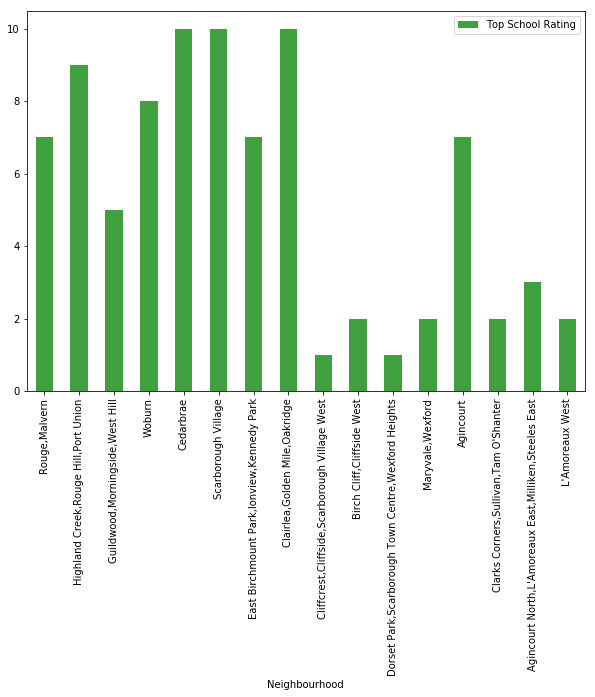

In [166]:
Scarborough_school_ratings.set_index('Neighbourhood',inplace=True,drop=True)

Scarborough_school_ratings.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);

In [ ]:
## Conclusion:

For this project, through a k-means cluster algorithm we separate the neighborhood into 04 clusters, which have similar neighborhoods around them. 
Using the above charts'Average Housing Prices' and 'Top School Rating',anyone can take decision